In [28]:
# Required for debug only. If you have data_fast_insights installed, you can delete this cell.
import sys
from pathlib import Path
import os

sys.path.append(str(Path(os.getcwd()).parent.parent))
sys.path.append(str(Path(os.getcwd()).parent))

In [29]:
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

from data_fast_insights import BinaryDependenceModelData
import data_fast_insights.calculations as calc
from data_fast_insights.plotting import plot_segments_basic_info

In [30]:
%config InlineBackend.figure_format = 'svg'

Getting the data

In [31]:
raw_data = datasets.fetch_california_housing()
print(raw_data['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [32]:
df = pd.DataFrame(raw_data['data'], columns=raw_data['feature_names'])
df['MedianHouseValue'] = raw_data['target']
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Using Data Fast Insights

Initializing model data

In [33]:
dmd = BinaryDependenceModelData(
    base_data=df,
    cat_cols=None,
    num_cols={'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'},
    y_name='MedianHouseValue',
    y_quantile=0.5)

Getting bins for numeric variables, optimizing for Information Value. 

In [34]:
num_bins = calc.make_bins(model_data=dmd)

[INFO] creating woe binning ...


Converting variables

In [35]:
dmd.convert_to_binary(bins=num_bins)

Calculating group importance and other metrics

In [36]:
res = calc.calculate_dependence(model_data=dmd)

Getting data about segments (dataframe is sorted by importance)

In [37]:
# print(res[res['perc_of_total'] > 5][:3][['low_perc', 'base_col']])
res[res['perc_of_total'] > 5].head(4)

,total_sum,low_sum,low_perc,high_perc,perc_of_total,target_delta_perc,base_col,base_breaks,base_range,base_cats
"AveOccup_[4.0,inf)",1750,1471,84.057143,15.942857,8.478682,-30.419798,AveOccup,"[2.0, 3.0, 4.0, inf]","[0.6923076923076923, 1243.3333333333333]",
"Longitude_[-121.0,-120.0)",1056,853,80.776515,19.223485,5.116279,-33.643621,Longitude,"[-122.0, -121.0, -120.0, -119.0, -118.0, inf]","[-124.35, -114.31]",
"MedInc_[-inf,3.0)",7365,5932,80.543109,19.456891,35.683140,-35.355346,MedInc,"[3.0, 4.0, 5.0, 7.0, inf]","[0.4999, 15.0001]",
"Latitude_[38.0,inf)",3087,2481,80.369291,19.630709,14.956395,-34.175187,Latitude,"[33.0, 35.0, 37.0, 38.0, inf]","[32.54, 41.95]",


#### Plotting basic info about features segments

With increasing the occupancy number house value drops

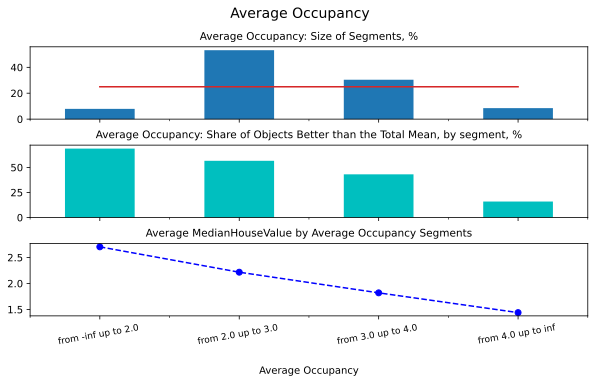

In [38]:
f = plot_segments_basic_info(
    model_data=dmd, res_low_df=res, base_feature_name='AveOccup', base_feature_rename='Average Occupancy')

There is a significant drop of house value in blocks 
located at Longitude from -121 up to -119 (not including -119), which requires further research.

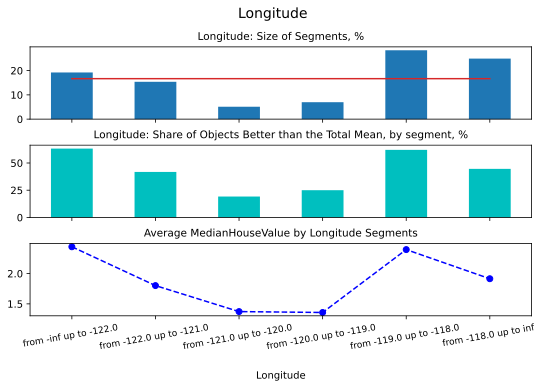

In [39]:
f = plot_segments_basic_info(
    model_data=dmd, res_low_df=res, base_feature_name='Longitude')
plt.gcf().set_size_inches(9.0, 5.5)

Blocks with residents having highest income contain the most highly valued houses.

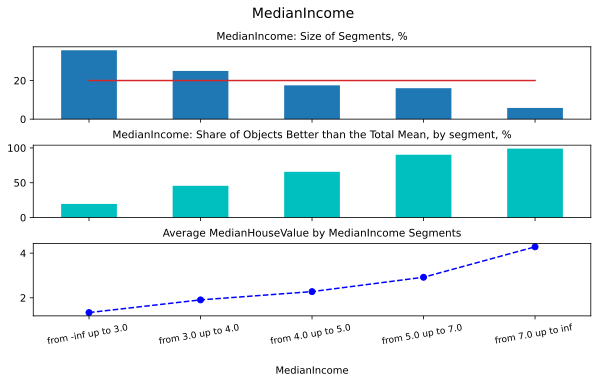

In [40]:
f = plot_segments_basic_info(
    model_data=dmd, res_low_df=res, base_feature_name='MedInc', base_feature_rename='MedianIncome')